In [54]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [56]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [57]:
# Get the column names
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [58]:
market_data_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

### Prepare the Data

In [59]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
market_data_df_scaled = scaler.fit_transform(market_data_df)
display(market_data_df_scaled)


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [60]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_df_scaled, columns=market_data_df.columns, index=market_data_df.index)

# Copy the crypto names from the original data
market_data_scaled_df = market_data_scaled_df.copy()

# Set the coinid column as index
market_data_scaled_df.index = market_data_df.index

# Display sample data
market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [61]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(market_data_scaled_df)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
import matplotlib.pyplot as plt
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,287.000000
1,2,198.571818
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,59.139070
6,7,48.406314
7,8,38.993588
8,9,34.400595
9,10,28.573603


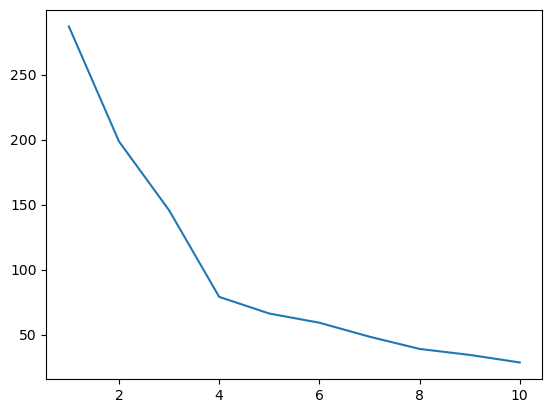

In [62]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df['k'], elbow_df['inertia'])


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**
There is no clear answer.  Values between 4 and 6 can be appropriate.  However, a k=4 is chosen for this excercise.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [63]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=4, n_init="auto", random_state=0)

In [64]:
# Fit the K-Means model using the scaled data
k_model.fit(market_data_scaled_df)

c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [65]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = k_model.predict(market_data_scaled_df)

# View the resulting array of cluster values.
predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [66]:
# Create a copy of the DataFrame
clustered_df = market_data_df.copy()

In [67]:
# Add a new column to the DataFrame with the predicted clusters
clustered_df["crypto_cluster"] = k_model.labels_

# Display sample data
clustered_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

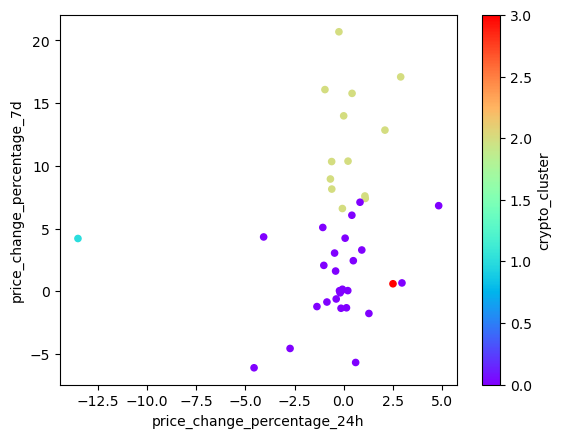

In [68]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
clustered_df.plot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", c="crypto_cluster", colormap="rainbow")


### Optimize Clusters with Principal Component Analysis.

In [69]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=2)

In [70]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
market_data_pca = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]


array([[-0.60066733,  0.84276006],
       [-0.45826071,  0.45846566],
       [-0.43306981, -0.16812638],
       [-0.47183495, -0.22266008],
       [-1.15779997,  2.04120919]])

In [71]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance


array([0.3719856 , 0.34700813])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [72]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(data=market_data_pca, columns=["PCA1", "PCA2"], index=market_data_df.index)

# Copy the crypto names from the original data
pca_df = pca_df.copy()

# Set the coinid column as index
pca_df.index = market_data_df.index

# Display sample data
pca_df.head(10)


,PCA1,PCA2
coin_id,,
bitcoin,-0.600667,0.842760
ethereum,-0.458261,0.458466
tether,-0.433070,-0.168126
ripple,-0.471835,-0.222660
bitcoin-cash,-1.157800,2.041209
binancecoin,-0.516534,1.388377
chainlink,-0.450711,0.517699
cardano,-0.345600,0.729439
litecoin,-0.649468,0.432165


### Find the Best Value for k Using the PCA Data

In [73]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_pca = list(range(1, 11))

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for i in k_pca:
    k_model_pca = KMeans(n_clusters=i, random_state=0)
    k_model_pca.fit(pca_df)
    inertia_pca.append(k_model_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_pca, "inertia": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is k

,k,inertia
0,1,206.351201
1,2,123.717780
2,3,52.498746
3,4,36.819548
4,5,25.265308
5,6,16.167179
6,7,7.409415
7,8,6.746606
8,9,5.287360
9,10,4.138225


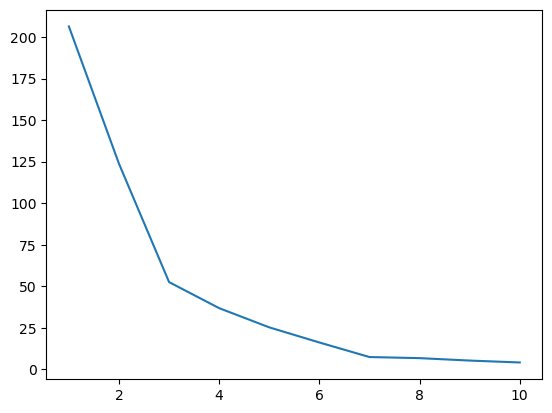

In [74]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'])


#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
k_model_pca = KMeans(n_clusters=3, n_init="auto", random_state=0)

In [76]:
# Fit the K-Means model using the PCA data
k_model_pca.fit(pca_df)

c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [77]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions_pca = k_model_pca.predict(pca_df)

# Print the resulting array of cluster values.
predictions_pca

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [78]:
# Create a copy of the DataFrame with the PCA data
clustered_df_pca = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_df_pca["crypto_cluster"] = k_model_pca.labels_

# Display sample data
clustered_df_pca.head(5)


,PCA1,PCA2,crypto_cluster
coin_id,,,
bitcoin,-0.600667,0.842760,0
ethereum,-0.458261,0.458466,0
tether,-0.433070,-0.168126,0
ripple,-0.471835,-0.222660,0
bitcoin-cash,-1.157800,2.041209,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

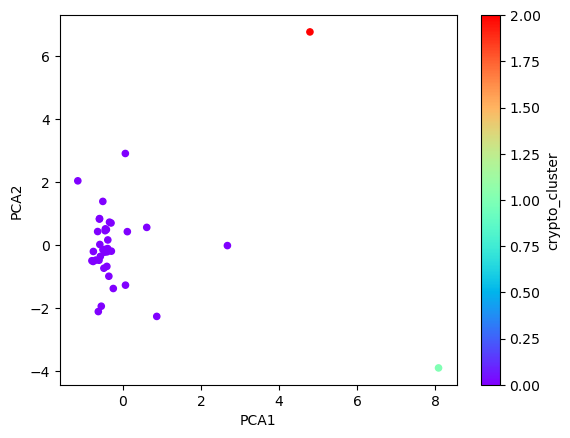

In [79]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
clustered_df_pca.plot.scatter(x="PCA1", y="PCA2", c="crypto_cluster", colormap="rainbow")


### Determine the Weights of Each Feature on each Principal Component

In [81]:
# Use the columns from the original scaled DataFrame as the index.
clustered_df_pca = pd.DataFrame(pca.components_.T, columns=["PCA1", "PCA2"], index=market_data_df.columns)
clustered_df_pca



,PCA1,PCA2
price_change_percentage_24h,-0.416728,0.358162
price_change_percentage_7d,-0.102432,0.227432
price_change_percentage_14d,-0.009162,0.540415
price_change_percentage_30d,0.191523,0.562182
price_change_percentage_60d,0.320365,0.434040
price_change_percentage_200d,0.594468,0.027735
price_change_percentage_1y,0.568379,-0.150789


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    